# Common words 
We will use nltk to find a bag of words that are applicable to the words in the job posts. 
Assumptions- 
- We are using bag of words to find keywords mentioned in job posts. It isn't common for a job post to commonly mention which skils they don't want. Their may be one or two but not enough to skew the data. We assume that when a word is mentioned that is is associated to a skill wantoing that skill.

In [29]:
import numpy as np
import pandas as pd 
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import popular_data_skills.utils.keywords as keywords
import popular_data_skills.config.config as config

In [2]:
df = pd.read_csv(config.WRANGLED_DATA_FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title              593 non-null    object 
 1   company_name           591 non-null    object 
 2   location               593 non-null    object 
 3   date_posted            593 non-null    object 
 4   applicant_count        480 non-null    float64
 5   job_description_lines  592 non-null    object 
 6   country                593 non-null    object 
 7   job                    593 non-null    object 
 8   experience             309 non-null    float64
dtypes: float64(2), object(7)
memory usage: 41.8+ KB


In [3]:
#df = df[df['job']== 'scientist'].copy()
#df = df[df['job']=='analyst'].copy()

We can see there is a null entry for job_description_lines. We can remove this for further processing.

In [4]:
df[df['job_description_lines'].isnull() == True]

,job_title,company_name,location,date_posted,applicant_count,job_description_lines,country,job,experience
96,data scientist marketing & online remote,the home depot,atlanta ga,2 months ago,NaN,NaN,usa,scientist,NaN


In [5]:
df.dropna(subset=['job_description_lines'], inplace=True) 

## Create corpus 
Next we will create a corpus of words we can use for further processing. 
We will join the job descriptions together. Next we will remove punctuations and new line symbols. After that we can remove common stopwords from nltk module.

In [6]:
df['job_description_lines']

0      \n              as a data engineer / machine l...
1      \none of our valued clients a leading and grow...
2      \n              at yelp it’s our mission to co...
3      \n              the freemium r&d team oversees...
4      \n              are you a talented data scient...
                             ...                        
588    \n              dice is the leading career des...
589    \ndescription\n\nsentient energy www.sentient-...
590    \n              acs is a consulting firm focus...
591    \n              finance / accounting\n\nremote...
592    \n              kore1 a nationwide provider of...
Name: job_description_lines, Length: 592, dtype: object

In [7]:
# Simple join throws type error. Needs to be converted to a string first 
corpus = " ".join(map(str, df['job_description_lines']))


In [8]:
# Remove new line marks
corpus = corpus.replace('\n', "")
# Remove punctuation
corpus = corpus.translate(str.maketrans('', '', string.punctuation))


Next we will remove unwanted common words that we can't use as keywords. We need to split the long string into a list of words. We will then use nltk.stopwords list to remove common words that we won't need.  

In [9]:
# Get stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
# Split string into words, append words not in stop words list.
word_list = [word for word in corpus.split() if word not in stop_words]
word_list


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['data',
 'engineer',
 'machine',
 'learning',
 'engineer',
 'responsible',
 'developing',
 'intelligence',
 'technology',
 'help',
 'customers',
 'remove',
 'harmful',
 'emissions',
 'inefficiency',
 'global',
 'operations',
 'working',
 'closely',
 'world',
 'class',
 'engineering',
 'team',
 'skills',
 'put',
 'test',
 'within',
 'challenging',
 'environments',
 'data',
 'machine',
 'learning',
 'engineers',
 'leverage',
 'latest',
 'cloud',
 'ml',
 'technologies',
 'azure',
 'gcp',
 'bring',
 'valuable',
 'insight',
 'innovation',
 'heavy',
 'industry',
 'particularly',
 'proud',
 'work',
 'recognising',
 'cargo',
 'deep',
 'learning',
 'technologies',
 'lot',
 'interesting',
 'challenges',
 'push',
 'waythis',
 'role',
 'involves',
 'working',
 'closely',
 'worlds',
 'largest',
 'energy',
 'mineral',
 'companies',
 'working',
 'scale',
 'pace',
 'expected',
 'well',
 'unafraid',
 'large',
 'data',
 'sets',
 'putting',
 'technical',
 'horsepower',
 'azure',
 'testno',
 'recruitment

We will now use nltk leminatize to remove purals and another common endings. 

In [10]:
# Use top_words list to manually scan list for keywords.  
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

stemmed_list = [lem.lemmatize(word) for word in word_list]
stemmed_list


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fatty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fatty\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['data',
 'engineer',
 'machine',
 'learning',
 'engineer',
 'responsible',
 'developing',
 'intelligence',
 'technology',
 'help',
 'customer',
 'remove',
 'harmful',
 'emission',
 'inefficiency',
 'global',
 'operation',
 'working',
 'closely',
 'world',
 'class',
 'engineering',
 'team',
 'skill',
 'put',
 'test',
 'within',
 'challenging',
 'environment',
 'data',
 'machine',
 'learning',
 'engineer',
 'leverage',
 'latest',
 'cloud',
 'ml',
 'technology',
 'azure',
 'gcp',
 'bring',
 'valuable',
 'insight',
 'innovation',
 'heavy',
 'industry',
 'particularly',
 'proud',
 'work',
 'recognising',
 'cargo',
 'deep',
 'learning',
 'technology',
 'lot',
 'interesting',
 'challenge',
 'push',
 'waythis',
 'role',
 'involves',
 'working',
 'closely',
 'world',
 'largest',
 'energy',
 'mineral',
 'company',
 'working',
 'scale',
 'pace',
 'expected',
 'well',
 'unafraid',
 'large',
 'data',
 'set',
 'putting',
 'technical',
 'horsepower',
 'azure',
 'testno',
 'recruitment',
 'company',


## Finding popular words 
Now we have a list of all the words we will use nltk to find how many times each word is mentioned and order them into the most popular words.

In [11]:
# Find most common words 
freq = nltk.FreqDist(stemmed_list)
top_words_ranked = freq.most_common(10000)

We will make a word cloud to visulise the most popular words in the job posts. 

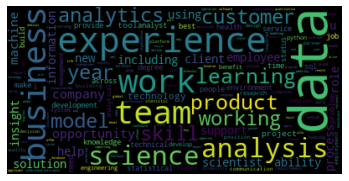

In [12]:
# Create a word cloud of most popular words
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

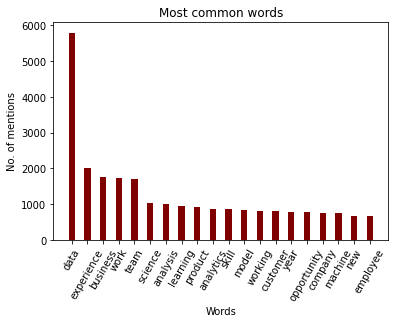

In [13]:
# Create bar chart of most popular words 

# Max words to show on the graph
num_entries = 20

# Split common words into two list for x and y axis
top_words, mentions = list(zip(*top_words_ranked))

# Create figure 
fig = plt.figure() 
ax = fig.gca()  

# Limit entries on each axis 
x = top_words[:num_entries]
y = mentions[:num_entries]

# create the bar plot
plt.bar(x, y, color ='maroon', width = 0.4)
plt.xlabel("Words")

plt.ylabel("No. of mentions")
plt.title("Most common words")
ax.tick_params(which='major',axis='x', labelrotation=60)

plt.show()

We will use our dict of lists keywords class to save a store the most common words. We will refine the keywords the next notebook. For now we will just save them. For more information about the keywords class look in the utils folder and also in the next notebook. 

In [14]:
keywords = keywords.Keywords()
keywords.read_dict(top_words)
keywords.dict


('data',
 'experience',
 'business',
 'work',
 'team',
 'science',
 'analysis',
 'learning',
 'product',
 'analytics',
 'skill',
 'model',
 'working',
 'customer',
 'year',
 'opportunity',
 'company',
 'machine',
 'new',
 'employee',
 'including',
 'role',
 'solution',
 'scientist',
 'u',
 'help',
 'support',
 'ability',
 'using',
 'insight',
 'information',
 'client',
 'process',
 'technology',
 'project',
 'tool',
 'knowledge',
 'health',
 'people',
 'problem',
 'development',
 'service',
 'statistical',
 'need',
 'status',
 'job',
 'provide',
 'environment',
 'degree',
 'across',
 'technical',
 'sql',
 'analyst',
 'time',
 'make',
 'build',
 'best',
 'engineering',
 'benefit',
 'complex',
 'python',
 'develop',
 'related',
 'management',
 'system',
 'analytical',
 'research',
 'communication',
 'building',
 'employment',
 'use',
 'position',
 'requirement',
 'computer',
 'quality',
 'looking',
 'disability',
 'value',
 'platform',
 'strong',
 'within',
 'statistic',
 'report',
 'dec

In [15]:
keywords.save(config.COMMON_WORDS)

In [25]:
filter_words = ['python','r', 'sql', 'statistic', 'analytic', 'ai', 'mathematic' ]

filtered_top_words_ranked = list(filter(lambda x: x[0] in filter_words, top_words_ranked))
filtered_top_words_ranked

[('sql', 430),
 ('python', 399),
 ('statistic', 331),
 ('r', 227),
 ('ai', 167),
 ('analytic', 132)]

C:\Users\fatty\AppData\Local\Temp\ipykernel_20616\4146931125.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation =55, fontsize=10)


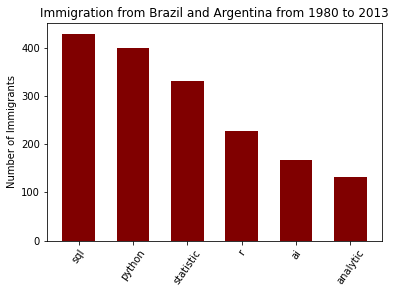

In [26]:
filtered_top_words, filtered_mentions  = zip(*filtered_top_words_ranked)
num_of_entries = 20
x = filtered_top_words[:num_of_entries]
y = filtered_mentions[:num_of_entries]
fig = plt.figure() 
ax = fig.gca()  

# creating the bar plot
plt.bar(x, y, color ='maroon', width = 0.6)
 



ax.set_ylabel('Number of Immigrants')
ax.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax.set_xticklabels(x, rotation =55, fontsize=10)
plt.show()


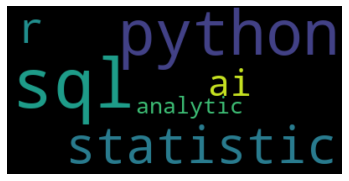

In [28]:
wordcloud = WordCloud()
most_common_skills_dict = dict(filtered_top_words_ranked)
wordcloud.generate_from_frequencies(frequencies=most_common_skills_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()